# Barrancas Del Cobre

Maps for <https://mexico.werthmuller.org/besucherreisen/barrancasdelcobre>.

You can find more explanatory examples in Travel.ipynb, also in this directory.

In [1]:
import numpy as np
import travelmaps as tm
from adashof import cm2in
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Disable DecompressionBombWarning
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
from matplotlib import rcParams
# Adjust dpi, so figure on screen and savefig looks the same
dpi = 200
rcParams['figure.dpi'] = dpi
rcParams['savefig.dpi'] = dpi

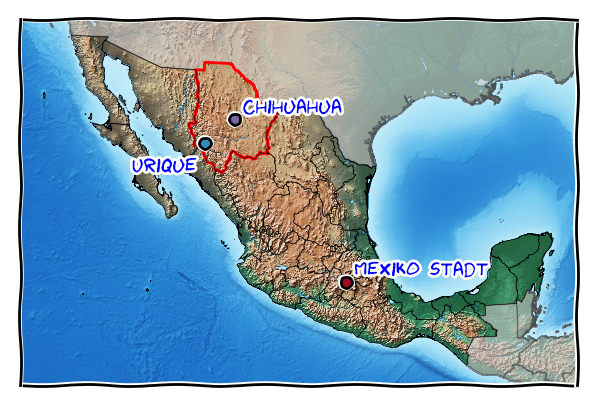

In [2]:
fig_x = plt.figure(figsize=(cm2in([11, 6])))

# Locations
MDF = [19.433333,  -99.133333] # Mexico City
URI = [27.216667, -107.916667] # Urique
CHI = [28.635278, -106.088889] # Chihuahua
# CRE = [27.752258, -107.634608] # Creel
# CUA = [28.405,    -106.866667] # Cuathémoc    

# Create basemap
m_x = Basemap(width=3500000, height=2300000, resolution='c', projection='tmerc', lat_0=24, lon_0=-102)

# Plot image
m_x.warpimage('./data/TravelMap/HYP_HR_SR_OB_DR/HYP_HR_SR_OB_DR.tif')

# Put a shade over non-Mexican countries
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
tm.country(countries, m_x, fc='.8', ec='.3', lw=.5, alpha=.6)

# Fill states
fcs = 32*['none']
ecs = 32*['k']
ecs[5] = 'r'
lws = 32*[.2,]
lws[5] = 1
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)

# Add visited cities
tm.city(URI, 'Urique', m_x, offs=[-.5, -1.5], halign="right")
tm.city(MDF, 'Mexiko Stadt', m_x, offs=[.5, .5])
tm.city(CHI, 'Chihuahua', m_x, offs=[.5, .5])
#tm.city(CRE, 'Creel', m_x, offs=[.5, .5])
#tm.city(CUA, 'Cuathemoc', m_x, offs=[.5, .5])

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/barrancasdelcobre/'
#plt.savefig(fpath+'MapUrique.png', bbox_inches='tight')
plt.show()

## Maps with Natural Earth backgrounds

I got the background image from [Natural Earth](http://www.naturalearthdata.com); it is the [10 m, Cross Blended Hypso with Relief, Water, Drains, and Ocean Bottom](http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/raster/HYP_HR_SR_OB_DR.zip). I changed the colour curves slightly in Gimp, to make the image darker.

**Adjustment for Natural Earth:**

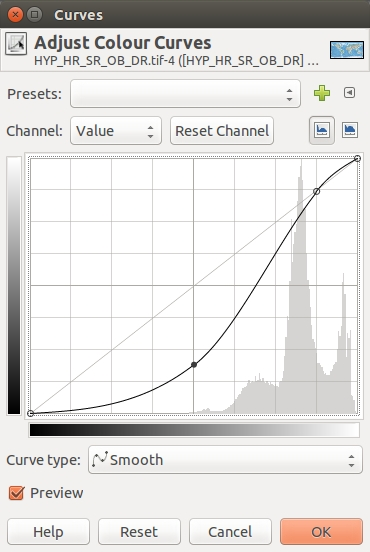

In [9]:
from IPython.display import Image
Image(filename='./data/TravelMap/HYP_HR_SR_OB_DR/Adjustment.jpg') 